In [2]:
%load_ext jupyternotify
import numpy as np
import pandas as pd
import matplotlib
import math
from sklearn import model_selection, ensemble, metrics, linear_model, preprocessing
from matplotlib import pyplot as plt
%matplotlib inline

<IPython.core.display.Javascript object>

In [2]:
pd.set_option('display.max_rows', None)

In [61]:
pd.set_option('display.max_rows', 10)

In [3]:
data = pd.read_csv('dataset/train.csv')

In [4]:
test = pd.read_csv('dataset/test.csv')

In [6]:
list(enumerate(data.columns))

[(0, 'galactic year'),
 (1, 'galaxy'),
 (2, 'existence expectancy index'),
 (3, 'existence expectancy at birth'),
 (4, 'Gross income per capita'),
 (5, 'Income Index'),
 (6, 'Expected years of education (galactic years)'),
 (7, 'Mean years of education (galactic years)'),
 (8, 'Intergalactic Development Index (IDI)'),
 (9, 'Education Index'),
 (10, 'Intergalactic Development Index (IDI), Rank'),
 (11, 'Population using at least basic drinking-water services (%)'),
 (12, 'Population using at least basic sanitation services (%)'),
 (13, 'Gross capital formation (% of GGP)'),
 (14, 'Population, total (millions)'),
 (15, 'Population, urban (%)'),
 (16, 'Mortality rate, under-five (per 1,000 live births)'),
 (17, 'Mortality rate, infant (per 1,000 live births)'),
 (18,
  'Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))'),
 (19, 'Population, ages 15–64 (millions)'),
 (20, 'Population, ages 65 and older (millions)'),
 (21, 'Life expectancy at birth, male (gala

In [22]:
print (test.columns[7])
test[test.iloc[:,0] == 27]

Mean years of education (galactic years)


,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII)
41,27,7,0.659660,63.940738,17323.267019,0.678189,12.452063,8.780434,0.638532,0.738510,...,11.204164,0.684239,0.687178,1.114842,179.106053,195.188927,19.766788,29.154971,33.776606,0.685646
57,27,75,0.682815,70.163893,15368.770876,0.716356,14.936837,10.235461,0.766032,0.527746,...,6.428840,0.702641,0.699396,0.869801,154.585525,206.087378,26.388623,9.795034,23.742147,0.788741
67,27,179,0.704373,62.578774,26545.496277,0.475344,11.654224,7.809612,0.594509,0.490001,...,6.928602,0.563622,0.498191,0.934718,209.322397,234.119429,NaN,6.396419,NaN,0.948781
83,27,152,0.729481,65.334385,20213.281664,0.710236,16.792718,8.187436,0.759934,0.785823,...,6.902993,0.788946,0.712283,0.949569,187.466791,168.104504,16.443804,5.834149,15.834209,0.756174
88,27,45,0.732327,71.532674,33360.840015,0.825167,13.147442,10.059363,0.760529,0.750277,...,11.120508,0.938336,0.716669,1.076733,180.956163,185.904734,14.821980,31.487193,20.285836,0.828074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,27,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886,27,117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887,27,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
888,27,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Data contains numerical values, except for "galaxy" and 
# "galactic year", which represent name and ordinal relationship
print(data.dtypes.values)
print(test.dtypes.values)

[dtype('int64') dtype('O') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('

In [9]:
#Test dataset contains objects only of latest 10 years,
#including unmentioned in train data latest year 1016064
unique_years = data['galactic year'].unique()
print (unique_years)
print (unique_years.shape)

print(np.sort(test['galactic year'].unique()))
print(test['galactic year'].unique().shape)

unique_names = data['galaxy'].unique()
unique_names = np.sort(unique_names)
print (unique_names[:5])
print(unique_names.shape)

[ 990025  991020  992016  993012  994009  995006  996004  997002  998001
  999000 1000000 1001000 1002001 1003002 1004004 1005006 1006009 1007012
 1008016 1009020 1010025 1011030 1012036 1013042 1014049 1015056]
(26,)
[1007012 1008016 1009020 1010025 1011030 1012036 1013042 1014049 1015056
 1016064]
(10,)
['Andromeda Galaxy (M31)' 'Andromeda I' 'Andromeda II' 'Andromeda III'
 'Andromeda IX']
(181,)


In [10]:
#Let's map all galactic years to years with increment of 1 year
# and map all galaxies to their unique integer key

#dictionary for replacement of galactic years with normal years
di = {val: ind+1 for ind, val in enumerate(np.append(unique_years,
                                                     1016064))}
#dictionary for replacement of names with integer keys
di_names = {val: ind+1 for ind, val in enumerate(unique_names)}
data.replace({'galactic year':di}, inplace=True)
test.replace({'galactic year':di}, inplace=True)

data.replace({'galaxy':di_names}, inplace=True)
test.replace({'galaxy':di_names}, inplace=True)

In [7]:
data[data['galaxy']==59].isna().sum(axis=1)

165     35
189     59
416     68
574     68
762     68
938     15
1256    68
1390    68
1475    68
1751    68
1889     7
2023    66
2188    66
2408    66
2677    66
2866     5
3019    66
3545     5
3678     5
dtype: int64

In [6]:
#Let's see how much data is missing for each feature
data.isna().mean().sort_values()

galactic year                                                                              0.000000
y                                                                                          0.000000
galaxy                                                                                     0.000000
existence expectancy index                                                                 0.000259
existence expectancy at birth                                                              0.000259
Gross income per capita                                                                    0.007245
Income Index                                                                               0.007245
Expected years of education (galactic years)                                               0.034411
Mean years of education (galactic years)                                                   0.093920
Intergalactic Development Index (IDI)                                                      0.101164


In [9]:
#Are there any new unknown galaxies in the test dataset?
#The answer is NO
a = set(data['galaxy'].unique())
b = set(test['galaxy'].unique())
b.issubset(a)

True

galactic year
1     0.081928
2     0.082005
3     0.082007
4     0.082011
5     0.082023
6     0.082027
7     0.082088
8     0.082100
9     0.082106
10    0.082111
11    0.082117
12    0.082297
13    0.082297
14    0.082300
15    0.082291
16    0.082288
17    0.082435
18    0.081335
19    0.081379
20    0.081381
21    0.081331
22    0.080062
23    0.094917
24    0.098005
25    0.087332
26    0.080857
Name: y, dtype: float64


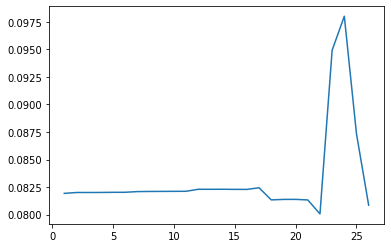

In [23]:
y_dist = data.groupby(['galactic year'])['y'].mean()
print (y_dist)
plt.plot(y_dist)

galaxy
1      0.043539
2      0.049126
3      0.176689
4      0.117387
5      0.166813
         ...   
177    0.190628
178    0.051538
179    0.042337
180    0.055283
181    0.044738
Name: y, Length: 181, dtype: float64


(array([125.,  21.,   8.,  10.,   8.,   6.,   0.,   2.,   0.,   1.]),
 array([0.03693184, 0.07251439, 0.10809694, 0.14367949, 0.17926205,
        0.2148446 , 0.25042715, 0.2860097 , 0.32159225, 0.3571748 ,
        0.39275736]),
 <a list of 10 Patch objects>)

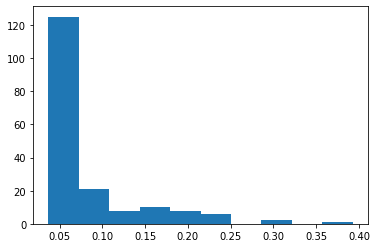

In [24]:
y_dist = data.groupby(['galaxy'])['y'].mean()
print(y_dist)
plt.hist(y_dist)

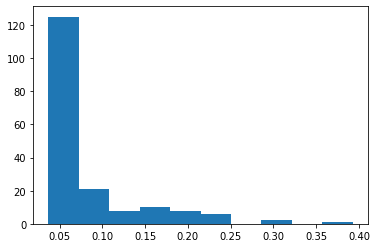

In [425]:
y_dist = data.groupby(['galaxy'])['y'].mean()
#print(y_dist)
plt.hist(y_dist)
plt.show()

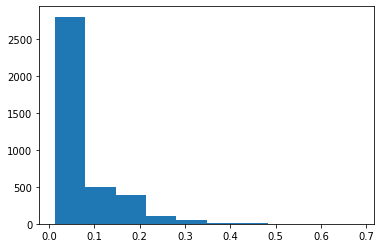

In [426]:
plt.hist(y)
plt.show()

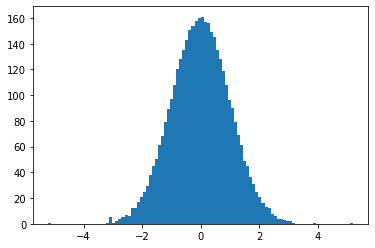

In [26]:
# transforming target y to follow a normal distribution
# to improve the quality of linear regression
from sklearn.preprocessing import QuantileTransformer, quantile_transform
qt = QuantileTransformer(n_quantiles=1000, output_distribution='normal' )
plt.hist(qt.fit_transform(y.reshape(-1, 1)), bins=100)
plt.show()

In [56]:
data.iloc[:, -1].describe()

count    3865.000000
mean        0.082773
std         0.063415
min         0.013036
25%         0.047889
50%         0.057820
75%         0.087389
max         0.683813
Name: y, dtype: float64

In [58]:
(unique_years - 990025)/1001

array([ 0.        ,  0.99400599,  1.98901099,  2.98401598,  3.98001998,
        4.97602398,  5.97302697,  6.97002997,  7.96803197,  8.96603397,
        9.96503497, 10.96403596, 11.96403596, 12.96403596, 13.96503497,
       14.96603397, 15.96803197, 16.97002997, 17.97302697, 18.97602398,
       19.98001998, 20.98401598, 21.98901099, 22.99400599, 24.        ,
       25.00599401])

In [196]:
#With the exception of one galaxy NGC 5253 (drop it?), there at least 17 points for each galaxy - nice
print(data.groupby(['galaxy'])['galactic year'].count().sort_values())

galaxy
127     1
181    17
20     17
8      17
27     17
       ..
156    26
17     26
18     26
10     26
11     26
Name: galactic year, Length: 181, dtype: int64


Let's try replacing all NaN in data with zeros. Furthermore in this part I assume that the target variable y does not depend on the galactic year nor the galaxy the data comes from. The assumption is that the final index is calculated solely based on the statistics of a given galaxy in a given year. In other words, I believe here that y is non-discriminative towards what galaxy and which year data is drawn from. 

In [56]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer

#cols_to_drop = [10, 73, 74] # The "rank" columns
cols_to_sel = [2, 5, 8, 9, 70, 71, 72, 78]

# Getting X and y
#X = data.drop(data.columns[cols_to_drop], axis=1).iloc[:, 0:-1].values   # Drop 'rank' columns
X = data.iloc[:, 0:-1].values    # Use all columns
#X = data[data.columns[cols_to_sel]].iloc[:, 0:-1].values # Select specific columns only
y = data.iloc[:, -1].values

# imputing missing values
# simple imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean', fill_value=0)

# iterative imputer 
# iterimputer = IterativeImputer(estimator=KNeighborsRegressor(), min_value=0, random_state=5, missing_values=np.nan)

X = imputer.fit_transform(X)
#X = imputer.fit_transform(X)

# normalize
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

# split
(X_train, X_test, y_train,
 y_test) = model_selection.train_test_split(X, y,
          test_size = 0.2, shuffle=True, random_state=425)

In [57]:
from sklearn.model_selection import cross_val_score as CVS
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as MSE
from sklearn.compose import TransformedTargetRegressor as TransTargReg
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import QuantileTransformer, quantile_transform
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

def RMSE(x,y):
    return MSE(x,y)**0.5

#creating a target transformer (normal)
qt = QuantileTransformer(n_quantiles=1000, output_distribution='normal' )

# shortcut for scorer
nrmse = 'neg_root_mean_squared_error'

lr = TransTargReg(regressor=linear_model.LinearRegression(),
                  transformer=qt)
lr.fit(X_train, y_train)

train_rmse = RMSE(y_train, lr.predict(X_train))
test_rmse = RMSE(y_test, lr.predict(X_test))
print(-CVS(lr, X_train, y_train, scoring=nrmse, cv=10).mean(), 'CV score Linreg on train data')
print(test_rmse, 'Linreg on test data\n')

SGDreg = TransTargReg(regressor=linear_model.SGDRegressor(
    loss='squared_loss',
    penalty='l2',
    alpha=0.01,
    l1_ratio=0.15,
    fit_intercept=True,
    max_iter=100000,
    tol=0.0001,
    shuffle=True,
    verbose=0,
    epsilon=0.1,
    random_state=None,
    learning_rate='invscaling',
    eta0=0.01,
    power_t=0.25,
    early_stopping=False,
    validation_fraction=0.1,
    n_iter_no_change=5,
    warm_start=False,
    average=False,
),
                      transformer=qt)
SGDreg.fit(X_train, y_train)

test_rmse = RMSE(y_test, SGDreg.predict(X_test))
print(-CVS(SGDreg, X_train, y_train, scoring=nrmse, cv=10).mean(), 'CV score SGDreg on train data')
print(test_rmse, 'SGDreg on test data')



0.03401480107761708 CV score Linreg on train data
0.03487935657267216 Linreg on test data

0.03458598633281745 CV score SGDreg on train data
0.03506612672123994 SGDreg on test data


In [58]:
#SVM
from sklearn import svm
svr = TransTargReg(regressor=svm.SVR(
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    tol=0.001,
    C=1.0,
    epsilon=0.1,
    shrinking=True,
    cache_size=200,
    verbose=False,
    max_iter=-1,),
                   transformer=qt)

print (-CVS(svr, X_train, y_train, scoring=nrmse, cv=5).mean(), 'CV score SVR on train data')
svr.fit(X_train, y_train)
print (RMSE(y_test, svr.predict(X_test)), 'SVR on test data')

0.03222367721084958 CV score SVR on train data
0.03211626702335784 SVR on test data


In [59]:
#Let's use RandomForest
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=500,
                              criterion='mse',
                              max_depth=None,
                              min_samples_split=2,
                              min_samples_leaf=1,
#                              max_features=26,
                              max_features=3,
                              n_jobs=3)

print(-CVS(forest, X_train,y_train, scoring=nrmse, cv=5).mean(), 'CV score 5-fold of RandomForest on train')
forest.fit(X_train, y_train)
print(RMSE(y_test, forest.predict(X_test)))

0.027923927341554432 CV score 5-fold of RandomForest on train
0.02856752010064952


In [60]:
#XGBoost
import xgboost as xgb
XGB = TransTargReg(xgb.XGBRegressor(max_depth=5,
    learning_rate=0.1,
    n_estimators=500,
    verbosity=1,
    silent=None,
    objective='reg:squarederror',
    booster='gbtree',
    n_jobs=3,
    nthread=None,
    gamma=0,
    min_child_weight=1,
    max_delta_step=0,
    subsample=0.5,
    colsample_bytree=1,
    colsample_bylevel=1,
    colsample_bynode=0.3,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    base_score=0.5,
    random_state=42,
    seed=None,
    missing=None,
    importance_type='gain'),
                   qt)
XGB.fit(X_train, y_train)

print(MSE(y_train, XGB.predict(X_train))**0.5)
print(MSE(y_test, XGB.predict(X_test))**0.5)

0.005261446406474647
0.021430010624459456


In [61]:
print(-CVS(XGB, X_train,y_train, scoring=nrmse, cv=5).mean(), 'CV score 5-fold of XGB on train')

0.023863671579118406 CV score 5-fold of XGB on train


Text(0.5, 1.0, 'Existence expectancy index')

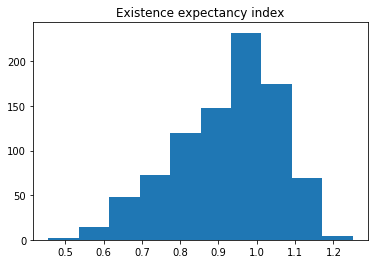

In [363]:
plt.hist(test.iloc[:, 2])
plt.title('Existence expectancy index')

In [174]:
%%time
#GridSearch for XGBoost RF hyperparameters
param_grid = {
    'regressor__max_depth': [4,5,6,7,8,9,10],
}
XGB_GSCV = model_selection.GridSearchCV(XGB,
                                        param_grid=param_grid,
                                        n_jobs=None,
                                        scoring='neg_root_mean_squared_error',
                                        cv=5)
XGB_GSCV.fit(X_train, y_train)

CPU times: user 15min 7s, sys: 6.59 s, total: 15min 13s
Wall time: 5min 18s


GridSearchCV(cv=5, error_score=nan,
             estimator=TransformedTargetRegressor(check_inverse=True, func=None,
                                                  inverse_func=None,
                                                  regressor=XGBRegressor(base_score=0.5,
                                                                         booster='gbtree',
                                                                         colsample_bylevel=1,
                                                                         colsample_bynode=0.3,
                                                                         colsample_bytree=1,
                                                                         gamma=0,
                                                                         importance_type='gain',
                                                                         learning_rate=0.1,
                                                                         max_delt

In [178]:
XGB_GSCV.cv_results_

{'mean_fit_time': array([8.89995465, 8.9333909 , 9.84126325, 8.97440581, 8.22846336,
        7.86384158, 7.95690532]),
 'std_fit_time': array([1.67190086, 0.12232464, 0.29496893, 0.57490031, 0.41312817,
        0.57069074, 0.80421783]),
 'mean_score_time': array([0.08116612, 0.119731  , 0.13009109, 0.11664319, 0.11383104,
        0.08596144, 0.08752522]),
 'std_score_time': array([0.02463343, 0.00088514, 0.00893756, 0.02076316, 0.02326621,
        0.00172069, 0.01074828]),
 'param_regressor__max_depth': masked_array(data=[4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'regressor__max_depth': 4},
  {'regressor__max_depth': 5},
  {'regressor__max_depth': 6},
  {'regressor__max_depth': 7},
  {'regressor__max_depth': 8},
  {'regressor__max_depth': 9},
  {'regressor__max_depth': 10}],
 'split0_test_score': array([-0.02127935, -0.02013852, -0.0193269 , -0.01971185, -0.02159502,
    

In [337]:
MSE(y_test, XGB_GSCV.best_estimator_.predict(X_test))**0.5

0.030103865780963007

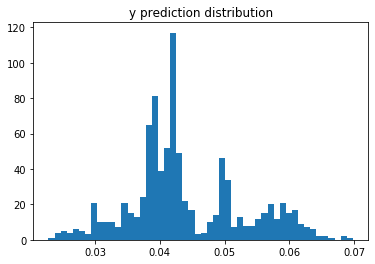

In [360]:
#y pred distribution
y_tpred = XGB.predict(test.iloc[:, 2:].values)
plt.hist(y_tpred, bins=50)
plt.title('y prediction distribution')
plt.show()

## Part 2 

In [495]:
#alpha is the coefficient before each E_i in calculating
#the likely index increase \Delta y_i multiplied by 1000
def P(y):
    return -np.log(y + 0.01) + 3
def alpha(y):
    return P(y)**2
p2slice = test.iloc[:, 2:3]
p2slice['y pred'] = pd.Series(y_tpred)
p2slice['alpha'] = pd.Series([alpha(x) for x in p2slice['y pred']])

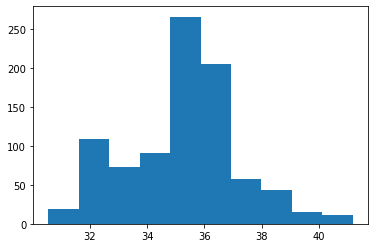

In [496]:
plt.hist(p2slice['alpha'])
plt.show()

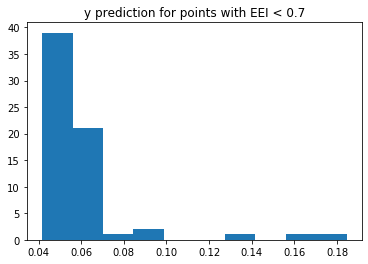

In [475]:
#finding points with EEI < 0.7
a = test.copy()
a['order index'] = pd.Series(test.index)

a = a.fillna(value=0)
EEI = a[(a.iloc[:, 2] < 0.7) & (a.iloc[:, 2] != 0)]

scaler = preprocessing.StandardScaler()
EEI = scaler.fit_transform(EEI.iloc[:, 2:-1])
y_eei = XGB.predict(EEI)

plt.hist(y_eei)
plt.title('y prediction for points with EEI < 0.7')
plt.show()

In [474]:
#First 66 points in test are actually the points that have EEI < 0.7
indices = a[(a.iloc[:, 2] < 0.7) & (a.iloc[:, 2] != 0)]['order index']
np.array_equal(np.array(indices), np.array(range(66)))

True

In [551]:
#how many rows are there with certain alpha values out of
#the ones with EEI < 0.7
p2slice[(p2slice['alpha']>33.76) & (p2slice.iloc[:, 0]<0.7)]

,existence expectancy index,y pred,alpha
0,0.456086,0.049377,33.917299
1,0.529835,0.047134,34.367255
2,0.560976,0.048802,34.030714
3,0.565910,0.049323,33.927881
4,0.588274,0.036177,36.908911
...,...,...,...
58,0.684616,0.022826,41.171827
60,0.685613,0.038868,36.223904
62,0.688025,0.035104,37.195049
63,0.692317,0.040405,35.852042


In [552]:
p2slice[(p2slice['alpha']>33.76)]

,existence expectancy index,y pred,alpha
0,0.456086,0.049377,33.917299
1,0.529835,0.047134,34.367255
2,0.560976,0.048802,34.030714
3,0.565910,0.049323,33.927881
4,0.588274,0.036177,36.908911
...,...,...,...
885,NaN,0.047341,34.324773
886,NaN,0.047341,34.324773
887,NaN,0.047341,34.324773
888,NaN,0.047341,34.324773


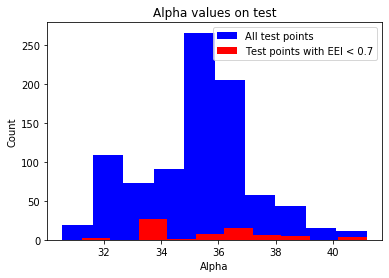

In [521]:
plt.hist(p2slice['alpha'], label='All test points', color='b')
plt.hist(p2slice.iloc[:66, -1],
         label ='Test points with EEI < 0.7', color='r')
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Count')
plt.title('Alpha values on test')
plt.show()

In [610]:
test.index

RangeIndex(start=0, stop=890, step=1)

In [653]:
#indices of 50 largest by alpha points that have EEI < 0.7
k = p2slice[p2slice['existence expectancy index']<0.7]['alpha'].nlargest(50).index.sort_values()
print (k)

#indices of 450 largest by alpha points after dropping the necessary 50 with EEI <0.7
a = p2slice.drop(k)['alpha'].nlargest(450).index.sort_values()
print(a)

k = np.array(k)
a = np.array(a)
ka = np.concatenate([k,a])
print(ka)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  9, 10, 11, 12, 14, 15, 16, 17, 18, 19,
            20, 21, 23, 25, 26, 27, 29, 30, 31, 33, 34, 36, 37, 38, 39, 41, 42,
            45, 46, 47, 48, 49, 51, 52, 54, 55, 56, 57, 58, 60, 62, 63, 64],
           dtype='int64')
Int64Index([ 67,  71,  72,  73,  76,  78,  79,  83,  85,  87,
            ...
            851, 859, 866, 868, 869, 872, 873, 874, 875, 878],
           dtype='int64', length=450)
[  0   1   2   3   4   5   6   9  10  11  12  14  15  16  17  18  19  20
  21  23  25  26  27  29  30  31  33  34  36  37  38  39  41  42  45  46
  47  48  49  51  52  54  55  56  57  58  60  62  63  64  67  71  72  73
  76  78  79  83  85  87  88  91  92  93  95  96  97  98  99 101 102 105
 106 107 108 109 111 112 115 117 118 119 120 122 123 124 125 126 127 129
 130 132 133 135 136 138 139 140 141 142 143 148 149 150 151 153 155 156
 157 158 160 162 163 164 166 167 169 172 173 174 175 178 180 181 182 185
 186 187 188 190 191 192 194 195 197 201 202 20

In [657]:
answer = pd.DataFrame(data={'index': test.index,
                  'pred': y_tpred,
                  'opt_pred': 0})
for i in ak:
    answer.iloc[i, 2] = 100

In [664]:
answer['opt_pred'].sum()

50000

In [663]:
answer[p2slice['existence expectancy index']<0.7]['opt_pred'].sum()

5000